In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None 

pkmn = pd.read_csv('All_Pokemon.csv')
pkmn.head(10)

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.00,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
5,5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,90.5,31.3
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,...,0.50,2.0,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2
9,7,Squirtle,Water,NaN,"['Rain Dish', 'Torrent']",44,48,65,50,64,...,1.00,1.0,1.0,1.0,1.0,0.5,1.0,0.5,9.0,36.0


In [2]:
pkmn.columns

Index(['Number', 'Name', 'Type 1', 'Type 2', 'Abilities', 'HP', 'Att', 'Def',
       'Spa', 'Spd', 'Spe', 'BST', 'Mean', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI'],
      dtype='object')

In [3]:
overgrow = pkmn['Abilities'].str.contains('Overgrow', case = False, na = False)
og_pkmn = pkmn.loc[overgrow]

og_pkmn.loc[og_pkmn['Spa'] > 80]

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
197,154,Meganium,Grass,NaN,"['Leaf Guard', 'Overgrow']",80,82,100,83,100,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.8,100.5,31.0
304,253,Grovyle,Grass,NaN,"['Overgrow', 'Unburden']",50,65,45,85,65,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,21.6,26.7
305,254,Sceptile,Grass,NaN,"['Overgrow', 'Unburden']",70,85,65,105,85,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.7,52.2,18.1
604,512,Simisage,Grass,NaN,"['Gluttony', 'Overgrow']",75,98,63,98,63,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.1,30.5,25.2
841,724,Decidueye,Grass,Ghost,"['Long Reach', 'Overgrow']",78,107,75,100,100,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.6,36.6,14.3


In [4]:
import re
pkmn.loc[pkmn['Name'].str.contains('^ch[a-z]*', flags=re.I, regex = True)]

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.50,2.0,1.0,1.0,1.0,0.50,0.5,0.6,8.5,23.6
5,5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,...,0.50,2.0,1.0,1.0,1.0,0.50,0.5,1.1,19.0,15.7
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,0.25,4.0,1.0,1.0,1.0,0.50,0.5,1.7,90.5,31.3
146,113,Chansey,Normal,NaN,"['Healer', 'Natural Cure', 'Serene Grace']",250,5,5,35,105,...,1.00,1.0,0.0,1.0,1.0,1.00,1.0,1.1,34.6,28.6
195,152,Chikorita,Grass,NaN,"['Leaf Guard', 'Overgrow']",45,49,65,49,65,...,2.00,1.0,1.0,1.0,1.0,1.00,1.0,0.9,6.4,7.9
213,170,Chinchou,Water,Electric,"['Illuminate', 'Volt Absorb', 'Water Absorb']",75,38,38,56,56,...,1.00,1.0,1.0,1.0,1.0,0.25,1.0,0.5,12.0,48.0
424,358,Chimecho,Psychic,NaN,['Levitate'],75,50,80,95,90,...,2.00,1.0,2.0,1.0,2.0,1.00,1.0,0.6,1.0,2.8
468,390,Chimchar,Fire,NaN,"['Blaze', 'Iron Fist']",44,58,44,58,44,...,0.50,2.0,1.0,1.0,1.0,0.50,0.5,0.5,6.2,24.8
500,420,Cherubi,Grass,NaN,['Chlorophyll'],45,35,45,62,53,...,2.00,1.0,1.0,1.0,1.0,1.00,1.0,0.4,3.3,20.6
501,421,Cherrim,Grass,NaN,['Flower Gift'],70,60,70,87,78,...,2.00,1.0,1.0,1.0,1.0,1.00,1.0,0.5,9.3,37.2


In [5]:
top_10_kg = pkmn.nlargest(10, 'Weight')
top_10_kg

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
914,790,Cosmoem,Psychic,NaN,['Sturdy'],43,29,131,29,131,...,2.00,1.0,2.0,1.0,2.0,1.0,1.0,0.1,999.9,99990.0
921,797,Celesteela,Steel,Flying,['Beast Boost'],97,101,103,107,101,...,0.25,1.0,1.0,0.5,1.0,0.5,0.5,9.2,999.9,11.8
457,383,Primal Groudon,Ground,Fire,['Desolate Land'],100,180,160,150,90,...,0.50,1.0,1.0,1.0,1.0,0.5,0.5,5.0,999.7,40.0
456,383,Groudon,Ground,NaN,['Drought'],100,150,140,100,90,...,1.00,0.5,1.0,1.0,1.0,1.0,1.0,3.5,950.0,77.6
1020,890,Eternatus,Poison,Dragon,['Pressure'],140,85,95,145,95,...,0.50,1.0,1.0,2.0,1.0,1.0,1.0,20.0,950.0,2.4
446,376,Mega Metagross,Steel,Psychic,['Tough Claws'],80,145,150,105,110,...,1.00,0.5,2.0,0.5,2.0,0.5,0.5,2.5,942.9,150.9
873,750,Mudsdale,Ground,NaN,"['Inner Focus', 'Own Tempo', 'Stamina']",100,125,100,55,85,...,1.00,0.5,1.0,1.0,1.0,1.0,1.0,2.5,920.0,147.2
923,799,Guzzlord,Dark,Dragon,['Beast Boost'],223,101,53,97,53,...,2.00,1.0,0.5,2.0,0.5,1.0,4.0,5.5,888.0,29.4
932,805,Stakataka,Rock,Steel,['Beast Boost'],61,131,211,53,101,...,0.50,0.5,1.0,0.5,1.0,1.0,0.5,5.5,820.0,27.1
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.00,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


In [69]:
pkmn.loc[432]

Number                                                        364
Name                                                       Sealeo
Type 1                                                        Ice
Type 2                                                      Water
Abilities                  ['Ice Body', 'Oblivious', 'Thick Fat']
HP                                                             90
Att                                                            60
Def                                                            70
Spa                                                            75
Spd                                                            70
Spe                                                            45
BST                                                           410
Mean                                                    68.333333
Standard Deviation                                      13.743685
Generation                                                    3.0
Experience

In [6]:
pkmn['Type 1']

0         Grass
1         Grass
2         Grass
3         Grass
4          Fire
         ...   
1027        Ice
1028      Ghost
1029    Psychic
1030    Psychic
1031    Psychic
Name: Type 1, Length: 1032, dtype: object

# Type Colour

In [48]:
type_color = {'Normal': 'lightgray', 'Fire': 'red', 'Water': 'blue', 'Grass': 'green', 'Electric': 'yellow',
              'Ice': 'cyan', 'Fighting': 'maroon', 'Poison': 'purple', 'Ground': 'sandybrown',
              'Flying': 'mediumpurple', 'Psychic': 'fuchsia', 'Bug': 'yellowgreen', 'Rock': 'sienna', 
              'Ghost': 'rebeccapurple', 'Dark': 'black', 'Dragon': 'indigo', 'Steel':'slategray',
              'Fairy': 'pink'}

In [49]:
[type_color[x] for x in top_10_kg['Type 1']]

['fuchsia',
 'slategray',
 'sandybrown',
 'sandybrown',
 'purple',
 'slategray',
 'sandybrown',
 'black',
 'sienna',
 'fuchsia']

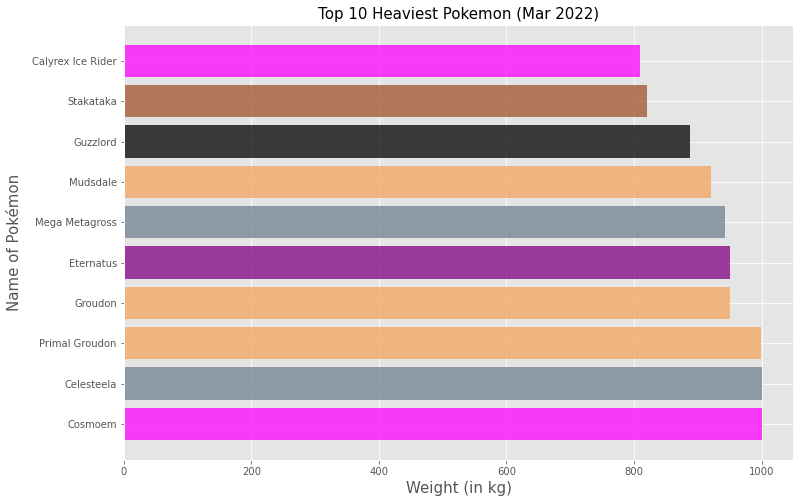

In [8]:
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')

plt.barh(top_10_kg['Name'], top_10_kg['Weight'], color = [type_color[x] for x in top_10_kg['Type 1']],
         alpha = 0.75)
    
plt.xlabel('Weight (in kg)', fontsize = 15)
plt.ylabel('Name of Pokémon', fontsize = 15, labelpad = 10)
plt.title('Top 10 Heaviest Pokemon (Mar 2022)', fontsize = 15)
plt.show()

In [9]:
top_10_bmi = pkmn.nlargest(10, 'BMI')
top_10_bmi

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
914,790,Cosmoem,Psychic,NaN,['Sturdy'],43,29,131,29,131,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,0.1,999.9,99990.0
360,302,Mega Sableye,Dark,Ghost,['Magic Bounce'],50,85,125,85,115,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,161.0,644.0
897,774,Minior Meteor Form,Rock,Flying,['Shields Down'],60,60,100,60,100,...,0.5,2.0,1.0,1.0,1.0,2.0,1.0,0.3,40.0,444.4
363,304,Aron,Steel,Rock,"['Heavy Metal', 'Rock Head', 'Sturdy']",50,70,100,40,40,...,0.5,0.5,1.0,0.5,1.0,1.0,0.5,0.4,60.0,375.0
731,632,Durant,Bug,Steel,"['Hustle', 'Swarm', 'Truant']",58,109,112,48,48,...,0.5,1.0,1.0,0.5,1.0,0.5,0.5,0.3,33.0,366.7
434,366,Clamperl,Water,NaN,"['Rattled', 'Shell Armor']",35,64,85,74,55,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.4,52.5,328.1
388,324,Torkoal,Fire,NaN,"['Drought', 'Shell Armor', 'White Smoke']",70,85,140,85,70,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.5,80.4,321.6
395,331,Cacnea,Grass,NaN,"['Sand Veil', 'Water Absorb']",50,85,40,85,40,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,51.3,320.6
528,446,Munchlax,Normal,NaN,"['Gluttony', 'Pickup', 'Thick Fat']",135,85,40,40,85,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6,105.0,291.7
892,769,Sandygast,Ghost,Ground,"['Sand Veil', 'Water Compaction']",55,55,80,70,45,...,0.5,0.5,2.0,1.0,2.0,1.0,1.0,0.5,70.0,280.0


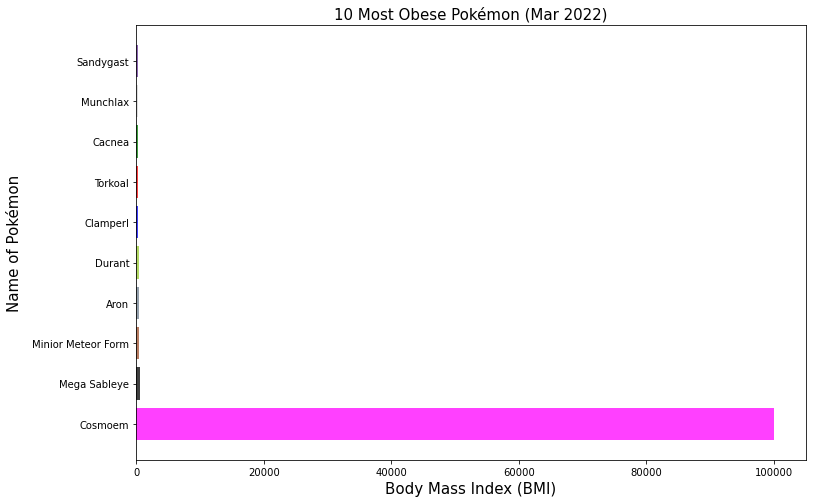

In [10]:
plt.figure(figsize = (12, 8))
plt.style.use('default')

plt.barh(top_10_bmi['Name'], top_10_bmi['BMI'], color = [type_color[x] for x in top_10_bmi['Type 1']],
         alpha = 0.75)
    
plt.xlabel('Body Mass Index (BMI)', fontsize = 15)
plt.ylabel('Name of Pokémon', fontsize = 15, labelpad = 10)
plt.title('10 Most Obese Pokémon (Mar 2022)', fontsize = 15)
plt.show()

In [11]:
top_11_bmi = pkmn.nlargest(11, 'BMI')
top_10_bmi_new = top_11_bmi[1:]
top_10_bmi_new

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
360,302,Mega Sableye,Dark,Ghost,['Magic Bounce'],50,85,125,85,115,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,161.0,644.0
897,774,Minior Meteor Form,Rock,Flying,['Shields Down'],60,60,100,60,100,...,0.5,2.0,1.0,1.0,1.0,2.0,1.0,0.3,40.0,444.4
363,304,Aron,Steel,Rock,"['Heavy Metal', 'Rock Head', 'Sturdy']",50,70,100,40,40,...,0.5,0.5,1.0,0.5,1.0,1.0,0.5,0.4,60.0,375.0
731,632,Durant,Bug,Steel,"['Hustle', 'Swarm', 'Truant']",58,109,112,48,48,...,0.5,1.0,1.0,0.5,1.0,0.5,0.5,0.3,33.0,366.7
434,366,Clamperl,Water,NaN,"['Rattled', 'Shell Armor']",35,64,85,74,55,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,0.4,52.5,328.1
388,324,Torkoal,Fire,NaN,"['Drought', 'Shell Armor', 'White Smoke']",70,85,140,85,70,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.5,80.4,321.6
395,331,Cacnea,Grass,NaN,"['Sand Veil', 'Water Absorb']",50,85,40,85,40,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,51.3,320.6
528,446,Munchlax,Normal,NaN,"['Gluttony', 'Pickup', 'Thick Fat']",135,85,40,40,85,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.6,105.0,291.7
892,769,Sandygast,Ghost,Ground,"['Sand Veil', 'Water Compaction']",55,55,80,70,45,...,0.5,0.5,2.0,1.0,2.0,1.0,1.0,0.5,70.0,280.0
443,374,Beldum,Steel,Psychic,"['Clear Body', 'Light Metal']",40,55,80,35,60,...,1.0,0.5,2.0,0.5,2.0,0.5,0.5,0.6,95.2,264.4


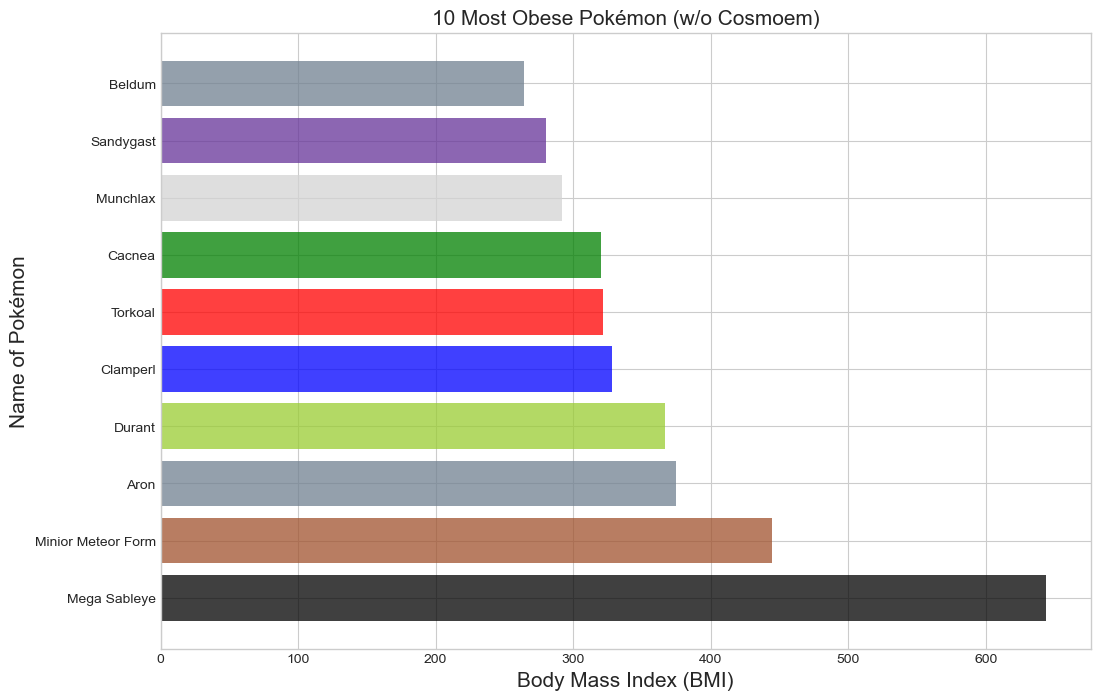

In [12]:
plt.figure(figsize = (12, 8))
plt.style.use('seaborn-whitegrid')

plt.barh(top_10_bmi_new['Name'], top_10_bmi_new['BMI'], color = [type_color[x] for x in top_10_bmi_new['Type 1']],
         alpha = 0.75)
    
plt.xlabel('Body Mass Index (BMI)', fontsize = 15)
plt.ylabel('Name of Pokémon', fontsize = 15)
plt.title('10 Most Obese Pokémon (w/o Cosmoem)', fontsize = 15)
plt.show()

In [13]:
pkmn['Type_1_color'] = [type_color[x] for x in pkmn['Type 1']]
pkmn

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1,green
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0,green
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0,green
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0,green
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3,cyan
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1,rebeccapurple
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4,fuchsia
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5,fuchsia


In [14]:
pkmn['Type_1_color'].value_counts(normalize = True)

blue             0.126938
lightgray        0.110465
green            0.088178
yellowgreen      0.078488
fuchsia          0.074612
red              0.062016
sienna           0.057171
yellow           0.057171
black            0.044574
indigo           0.040698
maroon           0.040698
sandybrown       0.039729
rebeccapurple    0.039729
purple           0.038760
cyan             0.036822
slategray        0.034884
pink             0.021318
mediumpurple     0.007752
Name: Type_1_color, dtype: float64

In [15]:
pkmn.dropna(subset = ['Type 2'])

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.00,1.0,0.5,0.7,6.9,14.1,green
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.00,1.0,0.5,1.0,13.0,13.0,green
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.00,1.0,0.5,2.0,100.0,25.0,green
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.00,1.0,0.5,2.4,155.5,27.0,green
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,4.0,1.0,1.0,1.00,0.5,0.5,1.7,90.5,31.3,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,892,Urshifu Single Strike Style,Fighting,Dark,['Unseen Fist'],100,130,100,63,60,...,0.5,0.5,1.0,0.25,1.0,4.0,1.9,105.0,29.1,maroon
1024,893,Zarude,Dark,Grass,['Leaf Guard'],105,120,105,70,95,...,1.0,0.5,1.0,0.50,1.0,2.0,1.8,70.0,21.6,black
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,1.0,2.0,1.0,2.00,1.0,1.0,1.1,7.7,6.4,fuchsia
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,1.0,2.00,2.0,1.0,2.4,809.1,140.5,fuchsia


In [16]:
pkmn['Height'].mean()

1.2868217054263558

In [17]:
top_10_height = pkmn.nlargest(10, 'Height')
top_10_height

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color
1020,890,Eternatus,Poison,Dragon,['Pressure'],140,85,95,145,95,...,1.00,1.0,2.0,1.0,1.0,1.0,20.0,950.0,2.4,purple
384,321,Wailord,Water,NaN,"['Oblivious', 'Pressure', 'Water Veil']",170,90,45,90,45,...,1.00,1.0,1.0,1.0,0.5,1.0,14.5,398.0,1.9,blue
134,103,Alolan Exeggutor,Grass,Dragon,"['Frisk', 'Harvest']",95,105,85,125,75,...,1.00,1.0,2.0,1.0,1.0,2.0,10.9,415.6,3.5,green
459,384,Mega Rayquaza,Dragon,Flying,['Delta Stream'],105,180,100,180,100,...,2.00,1.0,2.0,1.0,1.0,2.0,10.8,392.0,3.4,indigo
254,208,Mega Steelix,Steel,Ground,['Sand Force'],75,125,230,55,95,...,0.25,1.0,0.5,1.0,0.5,0.5,10.5,740.0,6.7,slategray
455,382,Primal Kyogre,Water,NaN,['Primordial Sea'],100,150,90,180,160,...,1.00,1.0,1.0,1.0,0.5,1.0,9.8,430.0,4.5,blue
253,208,Steelix,Steel,Ground,"['Rock Head', 'Sheer Force', 'Sturdy']",75,85,200,55,65,...,0.25,1.0,0.5,1.0,0.5,0.5,9.2,400.0,4.7,slategray
921,797,Celesteela,Steel,Flying,['Beast Boost'],97,101,103,107,101,...,1.00,1.0,0.5,1.0,0.5,0.5,9.2,999.9,11.8,slategray
125,95,Onix,Rock,Ground,"['Rock Head', 'Sturdy', 'Weak Armor']",35,45,160,30,45,...,0.50,1.0,1.0,1.0,2.0,1.0,8.8,210.0,2.7,sienna
869,746,Wishiwashi School,Water,NaN,['Schooling'],45,140,130,140,135,...,1.00,1.0,1.0,1.0,0.5,1.0,8.2,78.6,1.2,blue


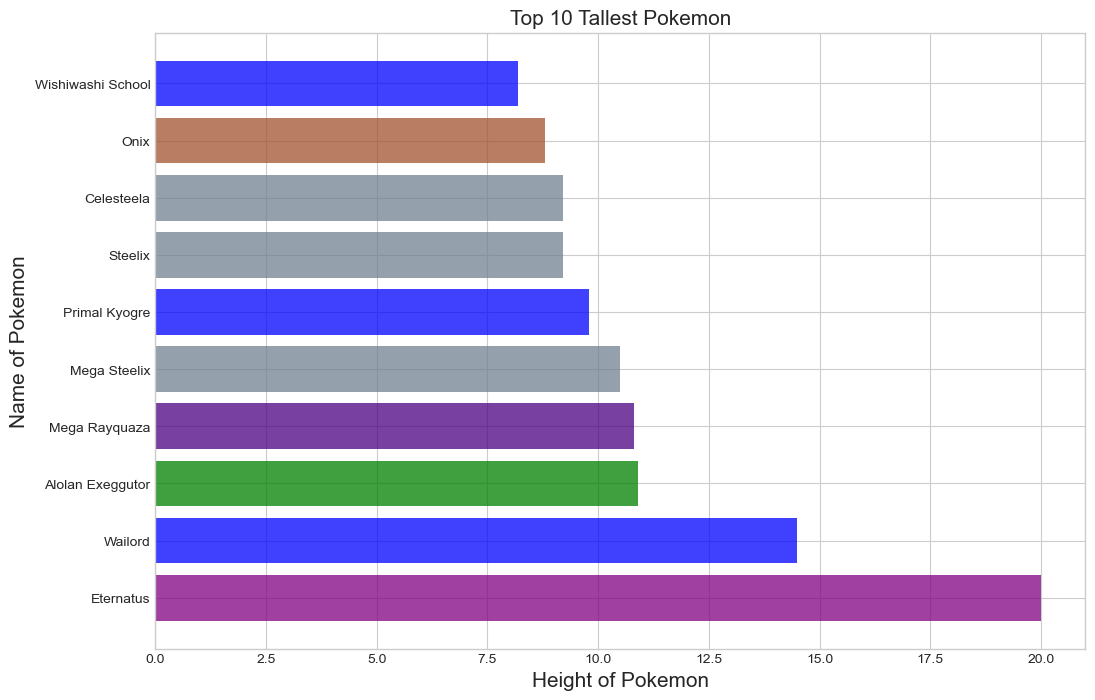

In [18]:
plt.figure(figsize = (12, 8))
plt.style.use('seaborn-whitegrid')

plt.barh(top_10_height['Name'], top_10_height['Height'], color = [type_color[x] for x in top_10_height['Type 1']],
         alpha = 0.75)
    
plt.xlabel('Height of Pokemon', fontsize = 15)
plt.ylabel('Name of Pokemon', fontsize = 15)
plt.title('Top 10 Tallest Pokemon', fontsize = 15)
plt.show()

In [19]:
pkmn['Type 1'].value_counts()

Water       131
Normal      114
Grass        91
Bug          81
Psychic      77
Fire         64
Rock         59
Electric     59
Dark         46
Dragon       42
Fighting     42
Ground       41
Ghost        41
Poison       40
Ice          38
Steel        36
Fairy        22
Flying        8
Name: Type 1, dtype: int64

In [20]:
pkmn['Type 2'].value_counts()

Flying      112
Psychic      42
Fairy        41
Ground       39
Poison       37
Steel        35
Fighting     31
Dragon       30
Grass        28
Ghost        27
Dark         26
Water        20
Ice          18
Fire         17
Rock         15
Electric     11
Normal       10
Bug           9
Name: Type 2, dtype: int64

In [47]:
all_types = pd.concat([pkmn['Type 1'], pkmn['Type 2']])
at = all_types.value_counts()
at

Water       151
Normal      124
Flying      120
Psychic     119
Grass       119
Bug          90
Fire         81
Ground       80
Poison       77
Rock         74
Fighting     73
Dark         72
Dragon       72
Steel        71
Electric     70
Ghost        68
Fairy        63
Ice          56
dtype: int64

In [59]:
at.index

Index(['Water', 'Normal', 'Flying', 'Psychic', 'Grass', 'Bug', 'Fire',
       'Ground', 'Poison', 'Rock', 'Fighting', 'Dark', 'Dragon', 'Steel',
       'Electric', 'Ghost', 'Fairy', 'Ice'],
      dtype='object')

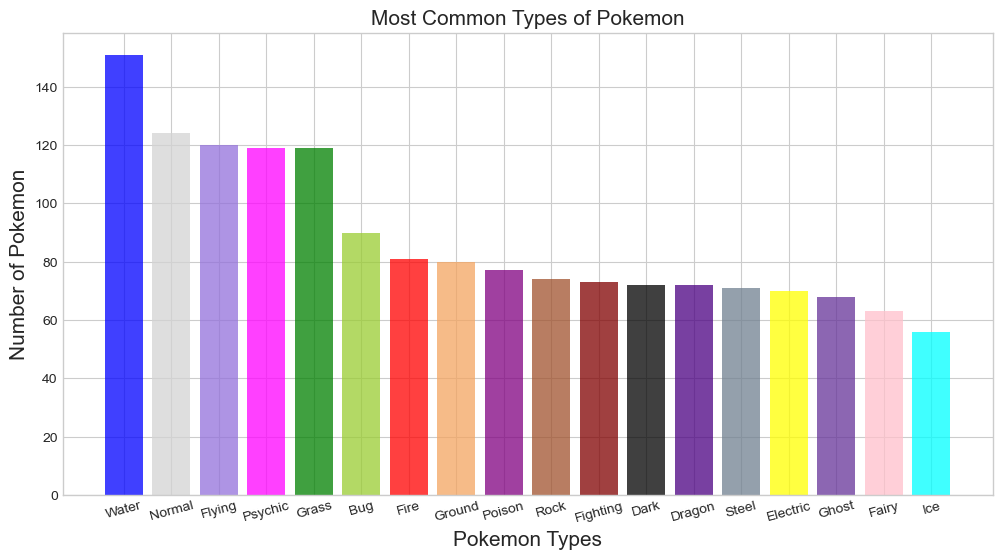

In [63]:
plt.figure(figsize = (12, 6))
plt.style.use('seaborn-whitegrid')

plt.bar(at.index, at, color = [type_color[x] for x in at.index], alpha = 0.75)
plt.xticks(rotation = 15)
    
plt.xlabel('Pokemon Types', fontsize = 15)
plt.ylabel('Number of Pokemon', fontsize = 15)
plt.title('Most Common Types of Pokemon', fontsize = 15)
plt.show()

<BarContainer object of 18 artists>

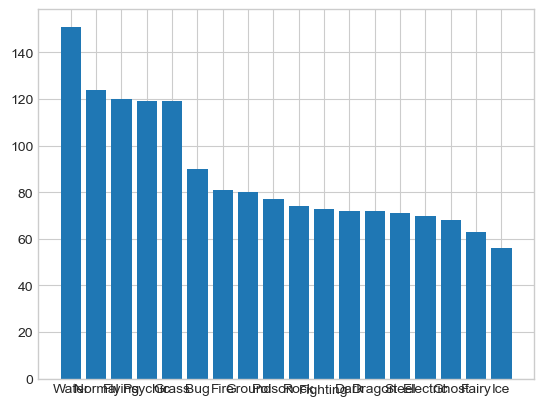

In [55]:
plt.bar(at.index, at)

In [22]:
pkmn['Type 2'].isnull().value_counts(normalize = True)

False    0.531008
True     0.468992
Name: Type 2, dtype: float64

In [23]:
type1 = pkmn['Type 1'] == 'Grass'
type2 = pkmn['Type 2'] == 'Poison'

dualtype = pkmn.loc[type1 & type2]
dualtype

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1,green
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0,green
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0,green
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0,green
55,43,Oddish,Grass,Poison,"['Chlorophyll', 'Run Away']",45,50,55,75,65,...,1.0,1.0,1.0,1.0,1.0,0.5,0.5,5.4,21.6,green
56,44,Gloom,Grass,Poison,"['Chlorophyll', 'Stench']",60,65,70,85,75,...,1.0,1.0,1.0,1.0,1.0,0.5,0.8,8.6,13.4,green
57,45,Vileplume,Grass,Poison,"['Chlorophyll', 'Effect Spore']",75,80,85,110,90,...,1.0,1.0,1.0,1.0,1.0,0.5,1.2,18.6,12.9,green
87,69,Bellsprout,Grass,Poison,"['Chlorophyll', 'Gluttony']",50,75,35,70,30,...,1.0,1.0,1.0,1.0,1.0,0.5,0.7,4.0,8.2,green
88,70,Weepinbell,Grass,Poison,"['Chlorophyll', 'Gluttony']",65,90,50,85,45,...,1.0,1.0,1.0,1.0,1.0,0.5,1.0,6.4,6.4,green
89,71,Victreebel,Grass,Poison,"['Chlorophyll', 'Gluttony']",80,105,65,100,70,...,1.0,1.0,1.0,1.0,1.0,0.5,1.7,15.5,5.4,green


In [24]:
pkmn2t = pkmn.dropna(subset = ['Type 2'], inplace = False)
pkmn2t

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.00,1.0,0.5,0.7,6.9,14.1,green
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.00,1.0,0.5,1.0,13.0,13.0,green
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.00,1.0,0.5,2.0,100.0,25.0,green
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.00,1.0,0.5,2.4,155.5,27.0,green
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,4.0,1.0,1.0,1.00,0.5,0.5,1.7,90.5,31.3,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,892,Urshifu Single Strike Style,Fighting,Dark,['Unseen Fist'],100,130,100,63,60,...,0.5,0.5,1.0,0.25,1.0,4.0,1.9,105.0,29.1,maroon
1024,893,Zarude,Dark,Grass,['Leaf Guard'],105,120,105,70,95,...,1.0,0.5,1.0,0.50,1.0,2.0,1.8,70.0,21.6,black
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,1.0,2.0,1.0,2.00,1.0,1.0,1.1,7.7,6.4,fuchsia
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,1.0,2.00,2.0,1.0,2.4,809.1,140.5,fuchsia


In [25]:
pkmn2t['Type_2_color'] = [type_color[x] for x in pkmn2t['Type 2']]
pkmn2t

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color,Type_2_color
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.00,1.0,0.5,0.7,6.9,14.1,green,purple
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.00,1.0,0.5,1.0,13.0,13.0,green,purple
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.00,1.0,0.5,2.0,100.0,25.0,green,purple
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.00,1.0,0.5,2.4,155.5,27.0,green,purple
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,1.0,1.0,1.00,0.5,0.5,1.7,90.5,31.3,red,mediumpurple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,892,Urshifu Single Strike Style,Fighting,Dark,['Unseen Fist'],100,130,100,63,60,...,0.5,1.0,0.25,1.0,4.0,1.9,105.0,29.1,maroon,black
1024,893,Zarude,Dark,Grass,['Leaf Guard'],105,120,105,70,95,...,0.5,1.0,0.50,1.0,2.0,1.8,70.0,21.6,black,green
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,2.0,1.0,2.00,1.0,1.0,1.1,7.7,6.4,fuchsia,green
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,1.0,2.00,2.0,1.0,2.4,809.1,140.5,fuchsia,cyan


In [26]:
merged_type = pkmn2t['Type 1'] + ' + ' + pkmn2t['Type 2']
pkmn2t['Combined Dual Types'] = merged_type
pkmn2t

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color,Type_2_color,Combined Dual Types
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.00,1.0,0.5,0.7,6.9,14.1,green,purple,Grass + Poison
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.00,1.0,0.5,1.0,13.0,13.0,green,purple,Grass + Poison
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.00,1.0,0.5,2.0,100.0,25.0,green,purple,Grass + Poison
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.00,1.0,0.5,2.4,155.5,27.0,green,purple,Grass + Poison
6,6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,...,1.0,1.00,0.5,0.5,1.7,90.5,31.3,red,mediumpurple,Fire + Flying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,892,Urshifu Single Strike Style,Fighting,Dark,['Unseen Fist'],100,130,100,63,60,...,1.0,0.25,1.0,4.0,1.9,105.0,29.1,maroon,black,Fighting + Dark
1024,893,Zarude,Dark,Grass,['Leaf Guard'],105,120,105,70,95,...,1.0,0.50,1.0,2.0,1.8,70.0,21.6,black,green,Dark + Grass
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,1.0,2.00,1.0,1.0,1.1,7.7,6.4,fuchsia,green,Psychic + Grass
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,1.0,2.00,2.0,1.0,2.4,809.1,140.5,fuchsia,cyan,Psychic + Ice


In [27]:
pkmn_dt = pkmn2t['Combined Dual Types'].value_counts()
top_10_dt = pkmn_dt.nlargest(10)
top_10_dt

Normal + Flying     27
Grass + Poison      15
Bug + Flying        14
Bug + Poison        12
Ghost + Grass       11
Water + Ground      10
Psychic + Fairy      9
Psychic + Flying     8
Grass + Flying       7
Fire + Flying        7
Name: Combined Dual Types, dtype: int64

In [28]:
lst = top_10_dt.index.str.split()
fr_lst = [x for l in lst for x in l]
sectypelst = fr_lst[2::3]
sectypelst

['Flying',
 'Poison',
 'Flying',
 'Poison',
 'Grass',
 'Ground',
 'Fairy',
 'Flying',
 'Flying',
 'Flying']

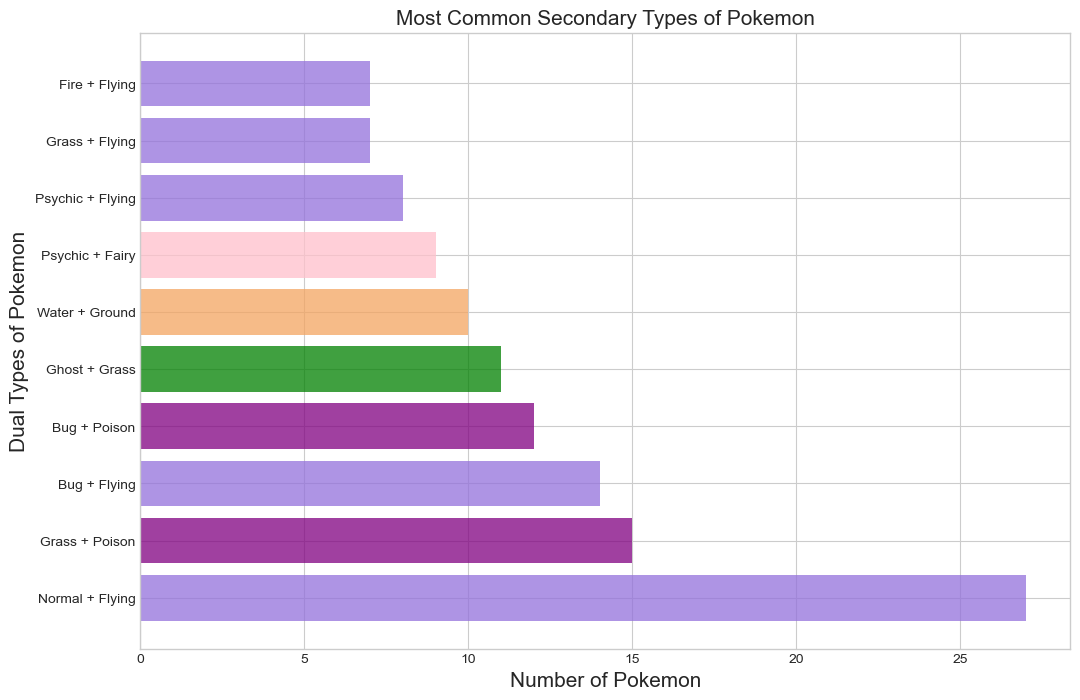

In [29]:
plt.figure(figsize = (12, 8))
plt.style.use('seaborn-whitegrid')

plt.barh(top_10_dt.index, top_10_dt, color = [type_color[x] for x in sectypelst], alpha = 0.75)
    
plt.xlabel('Number of Pokemon', fontsize = 15)
plt.ylabel('Dual Types of Pokemon', fontsize = 15)
plt.title('Most Common Secondary Types of Pokemon', fontsize = 15)
plt.show()

In [30]:
cr_sort = pkmn['Catch Rate'].value_counts().sort_index()
cr_sort

3       96
10       4
15       1
25      13
30      26
35       1
45     337
50       9
55       3
60      68
65       3
70       5
75      75
80       2
90      48
100      7
120     67
125      3
127      8
130      2
140      6
145      1
150      8
155      1
160      1
170      2
180     13
190     84
200     20
205      1
220      2
225     15
235      8
255     92
Name: Catch Rate, dtype: int64

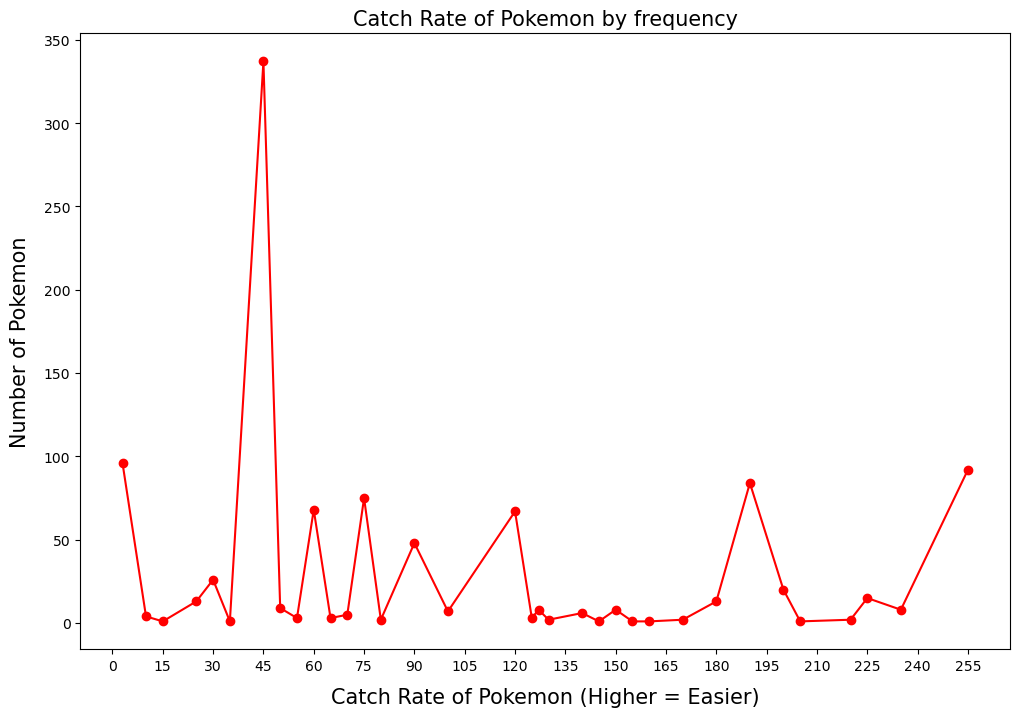

In [31]:
plt.figure(figsize = (12, 8))
plt.style.use('default')

plt.plot(cr_sort.index, cr_sort, color = 'r', marker = 'o')
    
plt.xlabel('Catch Rate of Pokemon (Higher = Easier)', fontsize = 15, labelpad = 10)
plt.ylabel('Number of Pokemon', fontsize = 15, labelpad = 10)
plt.title('Catch Rate of Pokemon by frequency', fontsize = 15)
plt.xticks(np.arange(0, 256, 15))
plt.show()

In [32]:
top_10_bst = pkmn.nlargest(10, 'BST')
top_10_bst

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI,Type_1_color
192,150,Mega Mewtwo Y,Psychic,NaN,['Insomnia'],106,150,70,194,120,...,1.00,2.0,1.0,2.0,1.0,1.0,1.5,33.0,14.7,fuchsia
193,150,Mega Mewtwo X,Psychic,Fighting,['Steadfast'],106,190,100,154,100,...,0.50,2.0,1.0,1.0,1.0,2.0,2.3,127.0,24.0,fuchsia
459,384,Mega Rayquaza,Dragon,Flying,['Delta Stream'],105,180,100,180,100,...,2.00,1.0,2.0,1.0,1.0,2.0,10.8,392.0,3.4,indigo
455,382,Primal Kyogre,Water,NaN,['Primordial Sea'],100,150,90,180,160,...,1.00,1.0,1.0,1.0,0.5,1.0,9.8,430.0,4.5,blue
457,383,Primal Groudon,Ground,Fire,['Desolate Land'],100,180,160,150,90,...,1.00,1.0,1.0,1.0,0.5,0.5,5.0,999.7,40.0,sandybrown
927,800,Ultra Necrozma,Psychic,Dragon,['Prism Armor'],97,167,97,167,97,...,1.00,2.0,2.0,2.0,1.0,2.0,7.5,230.0,4.1,fuchsia
585,493,Arceus,Normal,NaN,['Multitype'],120,120,120,120,120,...,1.00,0.0,1.0,1.0,1.0,1.0,3.2,320.0,31.3,lightgray
1017,888,Zacian Crowned Sword,Fairy,Steel,['Intrepid Sword'],92,170,115,80,115,...,0.50,1.0,0.0,0.5,1.0,0.5,2.8,355.0,45.3,pink
1019,889,Zamazenta Crowned Shield,Fighting,Steel,['Dauntless Shield'],92,130,145,80,145,...,0.25,1.0,0.5,0.5,0.5,1.0,2.9,785.0,93.3,maroon
833,718,Zygarde Complete,Dragon,Ground,"['Aura Break', 'Power Construct']",216,100,121,91,95,...,0.50,1.0,2.0,1.0,1.0,2.0,4.5,610.0,30.1,indigo


In [33]:
top_10_bst['BST']

192     780
193     780
459     780
455     770
457     770
927     754
585     720
1017    720
1019    720
833     708
Name: BST, dtype: int64

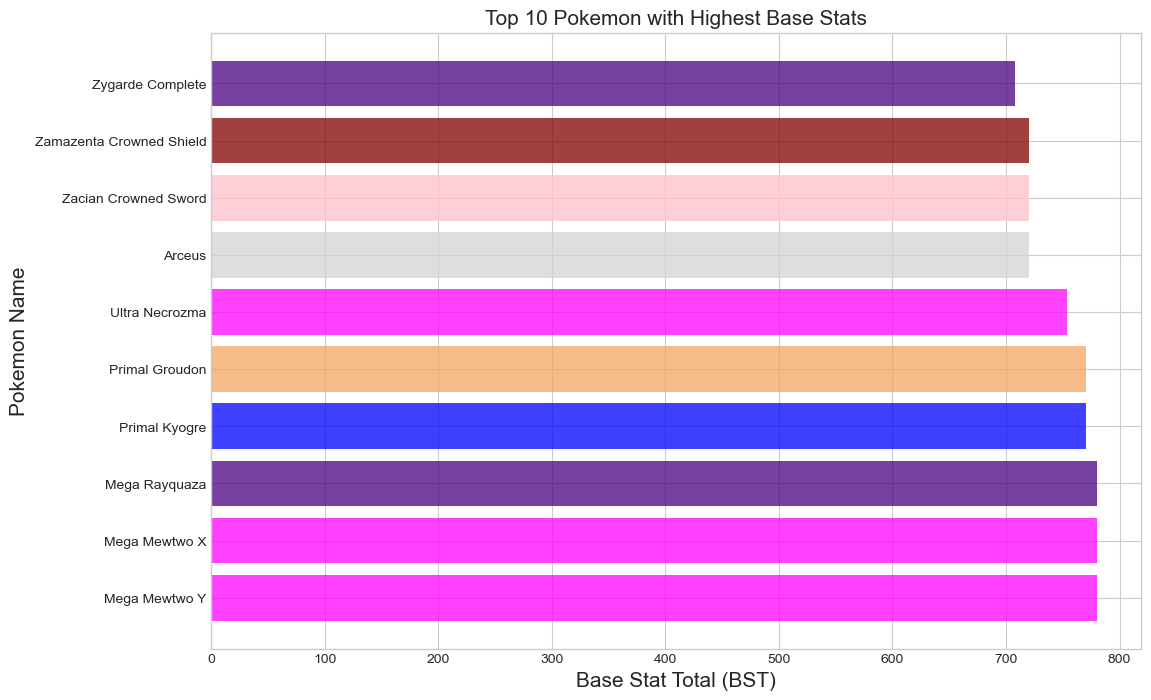

In [34]:
plt.figure(figsize = (12, 8))
plt.style.use('seaborn-whitegrid')

plt.barh(top_10_bst['Name'], top_10_bst['BST'], color = top_10_bst['Type_1_color'], alpha = 0.75)
    
plt.xlabel('Base Stat Total (BST)', fontsize = 15)
plt.ylabel('Pokemon Name', fontsize = 15)
plt.title('Top 10 Pokemon with Highest Base Stats', fontsize = 15)
plt.show()

In [35]:
bst_sort = pkmn['BST'].value_counts().sort_index()
bst_sort

175    1
180    2
185    1
190    1
194    1
      ..
708    1
720    3
754    1
770    2
780    3
Name: BST, Length: 215, dtype: int64

In [36]:
mean_sort = pkmn['Mean'].value_counts().sort_index()
mean_sort

29.166667     1
30.000000     2
30.833333     1
31.666667     1
32.333333     1
             ..
118.000000    1
120.000000    3
125.666667    1
128.333333    2
130.000000    3
Name: Mean, Length: 215, dtype: int64

In [37]:
pkmn.columns

Index(['Number', 'Name', 'Type 1', 'Type 2', 'Abilities', 'HP', 'Att', 'Def',
       'Spa', 'Spd', 'Spe', 'BST', 'Mean', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Legendary', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI', 'Type_1_color'],
      dtype='object')

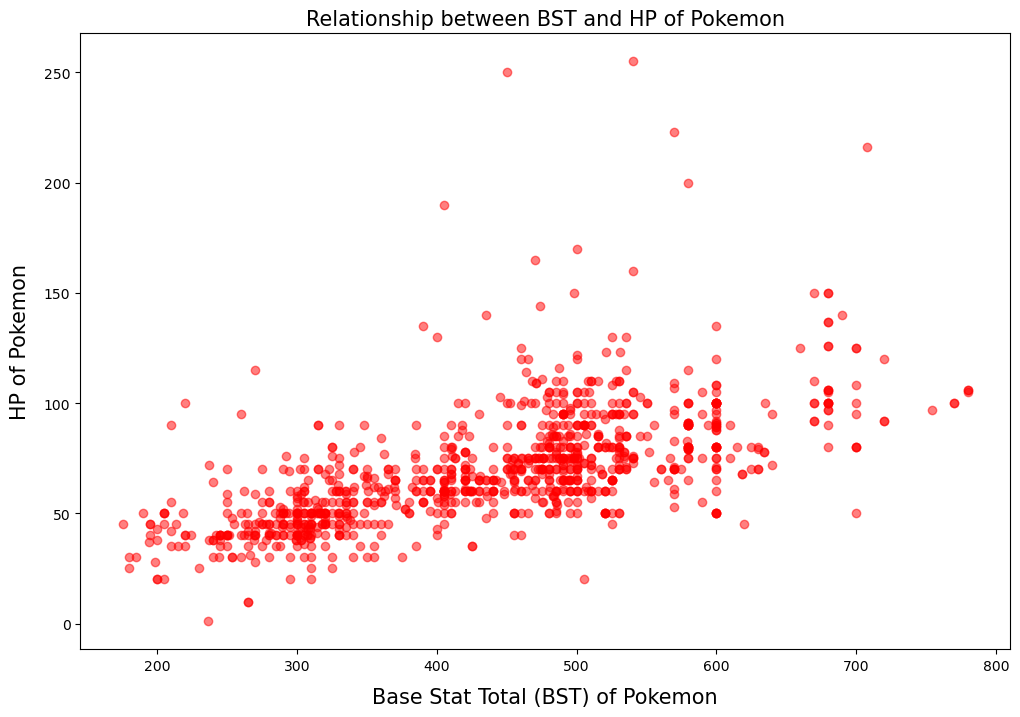

In [38]:
plt.figure(figsize = (12, 8))
plt.style.use('default')

plt.scatter(pkmn['BST'], pkmn['HP'], color = 'r', alpha = 0.5)
    
plt.xlabel('Base Stat Total (BST) of Pokemon', fontsize = 15, labelpad = 10)
plt.ylabel('HP of Pokemon', fontsize = 15, labelpad = 10)
plt.title('Relationship between BST and HP of Pokemon', fontsize = 15)

plt.show()

In [39]:
HP_bst = pd.DataFrame({'x': pkmn['BST'], 'y': pkmn['HP']})
HP_bst.corr()

,x,y
x,1.000000,0.636355
y,0.636355,1.000000


In [40]:
import statsmodels.formula.api as smf
model = smf.ols('HP ~ BST', data = pkmn)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     700.9
Date:                Thu, 05 May 2022   Prob (F-statistic):          3.07e-118
Time:                        18:45:23   Log-Likelihood:                -4565.8
No. Observations:                1032   AIC:                             9136.
Df Residuals:                    1030   BIC:                             9146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3276      2.373      3.931      0.0

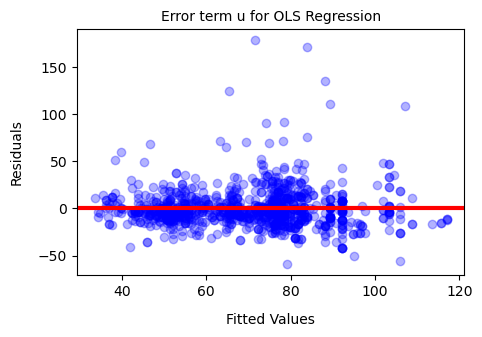

In [41]:
resid = result.resid
y_hat = result.fittedvalues

plt.figure(figsize = (5, 3.2))
plt.style.use('default')

plt.scatter(y_hat, resid, color = 'b', alpha = 0.3)
plt.axhline(0, linewidth = 3, c = 'r')
    
plt.xlabel('Fitted Values', fontsize = 10, labelpad = 10)
plt.ylabel('Residuals', fontsize = 10, labelpad = 10)
plt.title('Error term u for OLS Regression', fontsize = 10)

plt.show()